<a href="https://colab.research.google.com/github/conopuss/store-sales-summary/blob/main/demo_for_fiverr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
my_file = '/content/drive/MyDrive/Colab_Notebooks2/demo_data_analysis/store_sample_dirty.csv'

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv(my_file)

# part 1: DATA Cleaning
Step 1 — File and schema check (number of columns, column names, sample rows)

Step 2 — Standardize column names (remove spaces, special characters, ensure consistency)

Step 3 — Data type (dtype) inspection and type conversion plan

In [4]:
df.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,1,CA-2016-152156,11/8/2016,11112016,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.9136
1,1,2,CA-2016-152156,11/8/2016,11112016,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",$731.94,3,0.00,219.5820
2,2,3,CA-2016-138688,6/12/2016,06162016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.8714
3,3,4,US-2015-108966,10/11/2015,10182015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1000 non-null   int64  
 1   Row ID         1000 non-null   int64  
 2   Order ID       1000 non-null   object 
 3   Order Date     1000 non-null   object 
 4   Ship Date      1000 non-null   object 
 5   Ship Mode      1000 non-null   object 
 6   Customer ID    1000 non-null   object 
 7   Customer Name  1000 non-null   object 
 8   Segment        1000 non-null   object 
 9   Country        1000 non-null   object 
 10  City           1000 non-null   object 
 11  State          1000 non-null   object 
 12  Postal Code    1000 non-null   int64  
 13  Region         1000 non-null   object 
 14  Product ID     1000 non-null   object 
 15  Category       1000 non-null   object 
 16  Sub-Category   1000 non-null   object 
 17  Product Name   1000 non-null   object 
 18  Sales    

In [6]:
df.columns = (df.columns.astype(str).str.strip().str.lower().str.replace('-','_',regex=False).
              str.replace(r'\s+', '_', regex=True).str.replace(r'[^0-9a-z_]','',regex=True))
df.columns = df.columns.astype(str).str.replace('Id','ID', regex=False)

In [7]:
df.columns

Index(['unnamed_0', 'row_id', 'order_id', 'order_date', 'ship_date',
       'ship_mode', 'customer_id', 'customer_name', 'segment', 'country',
       'city', 'state', 'postal_code', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit'],
      dtype='object')

In [8]:
print(df['unnamed_0'].min(),df['unnamed_0'].max())

0 999


In [9]:
df['unnamed_0'].head(20)

,unnamed_0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [10]:
df = df.drop('unnamed_0',axis=1)

In [11]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

The column data types need correction: the date columns should be datetime, and Sales should be numeric (float). We’ll handle date parsing in Step 11 and numeric normalization in Step 12 (with minor text cleanup in Step 10 if needed).

Step 4 — Unify missing value representations (NA/NaN/“N/A”/blank, etc.)   
Step 5 — Missing value profile (count, percentage, per-column patterns)         
Step 6 — Detect and handle exact duplicate rows


In [12]:
class Missing_Values:
  def __init__(self,column,df):
    self.df = df
    self.column = column
    self.null_value = None
    self.duplicate_value = None
  def __str__(self):
    return f""" The missing values are converted to 'nan' values,
                The number of null values is {self.null_value}
                The number of dubbed etries is {self.duplicate_value}
    """
  def missing_value_rep(self):

    mask = self.df[self.column].isin(["N/A", "NA", ""])
    if mask.any():
      self.df[self.column].replace(["N/A", "NA", "","n/a", "none", "null", "-", "?"],np.nan,inplace=True)
    else:
      print('There is no "N/A", "NA", "" value!')

  def null_values(self):
    mask_null = self.df[self.column].isnull()
    if mask_null.any():
      self.null_value = self.df[self.column].isnull().sum()
      return self.null_value
    else:
      print('There is no "null" value!')
      return 0

  def dubb_value(self):
    mask_dub = self.df[self.column].duplicated()
    if mask_dub.any():
      self.duplicate_value = self.df[self.column].duplicated().sum()
      return self.duplicate_value
    else:
      print('There is no "dublicated" value!')
      return 0

In [13]:
my_object_columns = df.select_dtypes(include=['object']).columns


for column in my_object_columns:
  my_check = Missing_Values(column,df)
  my_check.missing_value_rep()

There is no "N/A", "NA", "" value!
There is no "N/A", "NA", "" value!
There is no "N/A", "NA", "" value!
There is no "N/A", "NA", "" value!
There is no "N/A", "NA", "" value!
There is no "N/A", "NA", "" value!
There is no "N/A", "NA", "" value!
There is no "N/A", "NA", "" value!
There is no "N/A", "NA", "" value!
There is no "N/A", "NA", "" value!
There is no "N/A", "NA", "" value!
There is no "N/A", "NA", "" value!
There is no "N/A", "NA", "" value!
There is no "N/A", "NA", "" value!
There is no "N/A", "NA", "" value!
There is no "N/A", "NA", "" value!


In [14]:
for column in df:
  my_isnull_check = Missing_Values(column,df)
  my_isnull_check.null_values()

There is no "null" value!
There is no "null" value!
There is no "null" value!
There is no "null" value!
There is no "null" value!
There is no "null" value!
There is no "null" value!
There is no "null" value!
There is no "null" value!
There is no "null" value!
There is no "null" value!
There is no "null" value!
There is no "null" value!
There is no "null" value!
There is no "null" value!
There is no "null" value!
There is no "null" value!
There is no "null" value!
There is no "null" value!
There is no "null" value!
There is no "null" value!


Step 7 — Validate expected unique keys (unique ID check)

In [15]:
df.isnull().sum()

,0
row_id,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_id,0
customer_name,0
segment,0
country,0
city,0


In [16]:
check_my_dub = Missing_Values('row_id', df)
check_my_dub.dubb_value()

There is no "dublicated" value!


0

In [17]:
df.duplicated().sum()
# Count of exact duplicate rows (excluding the first occurrence).
# 0 means there are NO duplicate rows.

np.int64(0)

In [18]:
df.notna().all() # Dataset-level completeness: True = NO missing values anywhere.

,0
row_id,True
order_id,True
order_date,True
ship_date,True
ship_mode,True
customer_id,True
customer_name,True
segment,True
country,True
city,True


In [19]:
df['row_id'].is_unique # Primary-key uniqueness: True => no duplicates in 'row_id'.

True

In [20]:
df['row_id'].notna().all() # Key null check: True => no nulls in 'row_id'.

np.True_

Step 8 — Basic field-level validations (range/domain rules)     


In [21]:
df['quantity'].unique() # No inconsistent entry

array([ 2,  3,  5,  7,  4,  6,  9,  1,  8, 14, 11, 13, 10, 12])

In [22]:
df['discount'].unique()

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

In [23]:
print(df['discount'].min(), df['discount'].max()) # Discount values are within the expected 0–1 range. No inconsistent entry found.

0.0 0.8


In [24]:
loss = df.groupby(df['profit']<0)['discount'].mean()
loss

,discount
profit,
False,0.085995
True,0.498280


(0.0, 2.1435427320137492)

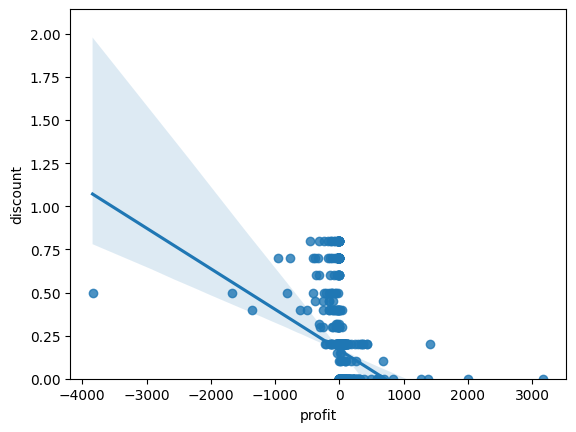

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x='profit', y='discount', data=df)
plt.ylim(0,)

In [26]:
loss # # Average discount ≈ 50% for loss-making sales vs ≈ 8.6% for profitable ones; results are consistent with business logic.


,discount
profit,
False,0.085995
True,0.498280


Step 9 — Categorical variable levels: unexpected values and spelling variants

In [27]:
df['ship_mode'].value_counts()  # No inconsistent, unexpected value or spelling variants

,count
ship_mode,
Standard Class,586
Second Class,213
First Class,184
Same Day,17


In [28]:
for value in df[['segment','country']]:    # No inconsistent, unexpected value or spelling variants
  print(df[value].value_counts().sort_index())
  print(' ')

segment
Consumer       547
Corporate      283
Home Office    170
Name: count, dtype: int64
 
country
United States    1000
Name: count, dtype: int64
 


In [29]:
for value in df[['city','state']]:
  print(df[value].value_counts().sort_index())
  print('')     # No inconsistent, unexpected value or spelling variants for the 'State' column

city
Akron          3
Alexandria     1
Amarillo       1
Anaheim        1
Arlington      6
              ..
West Jordan    1
Westfield      1
Westland       1
Whittier       1
Wilmington     8
Name: count, Length: 174, dtype: int64

state
Alabama             4
Arizona            23
Arkansas            2
California        183
Colorado           35
Connecticut         6
Delaware            8
Florida            42
Georgia             8
Illinois           52
Indiana            10
Iowa                8
Kentucky           18
Louisiana           9
Maryland            1
Massachusetts       8
Michigan           42
Minnesota          21
Mississippi         6
Missouri            3
Montana             4
Nebraska            4
Nevada              1
New Hampshire       4
New Jersey         16
New Mexico          2
New York          135
North Carolina     22
Ohio               54
Oklahoma            3
Oregon              9
Pennsylvania       79
Rhode Island        2
South Carolina      2
Tennessee     

In [30]:
rare_cities = df['city'].value_counts()[df['city'].value_counts() ==1]
rare_cities.sort_index()              # No inconsistent, unexpected value or spelling variants

,count
city,
Alexandria,1
Amarillo,1
Anaheim,1
Asheville,1
Bloomington,1
Boca Raton,1
Brentwood,1
Bristol,1
Carlsbad,1


In [31]:
df['region'].value_counts()  # No inconsistent, unexpected value or spelling variants

,count
region,
East,313
West,301
Central,245
South,141


In [32]:
for value in df[['category','sub_category']]:
  print(df[value].value_counts().sort_index())
  print('')             # No inconsistent, unexpected value or spelling variants in Sub-Category
                        # However, there is a miss spelled entry in Category column


category
Furniture          202
Furnture             5
Office Supplies    603
Technology         190
Name: count, dtype: int64

sub_category
Accessories     83
Appliances      43
Art             81
Binders        145
Bookcases       21
Chairs          58
Copiers          6
Envelopes       30
Fasteners       21
Furnishings     95
Labels          41
Machines        13
Paper          127
Phones          88
Storage         95
Supplies        20
Tables          33
Name: count, dtype: int64



In [33]:
df['category'] = df['category'].astype(str).str.replace('Furnture','Furniture', regex=False)

In [34]:
df['category'].value_counts()

,count
category,
Office Supplies,603
Furniture,207
Technology,190


In [35]:
df['product_name'].value_counts().sort_index()    # Due to quantity of values, it will be checked by the method below

,count
product_name,
"#10 Gummed Flap White Envelopes, 100/Box",1
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",1
"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",1
"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",1
"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators",1
...,...
Zebra Zazzle Fluorescent Highlighters,2
Zipper Ring Binder Pockets,1
i.Sound Portable Power - 8000 mAh,1


In [36]:
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 14.8 MB/s eta 0:00:00


In [37]:
import pandas as pd
from rapidfuzz import process, fuzz

product_names = df['product_name'].unique()

matches = []

for name in product_names:
  similar = process.extract(name, product_names,scorer=fuzz.ratio, limit=5)
  similar = [item for item in similar if item[0] != name and item[1] > 90]

  if similar:
    matches.append({name:similar})

seen_pairs = set()
result_rows = []

for match in matches:
  for key, values in match.items():
    for similar_name, score, idx in values:
      pair = tuple(sorted([key, similar_name]))
      if pair not in seen_pairs:
        seen_pairs.add(pair)
        result_rows.append({
            'Original Product': key,
            'Similar Product': similar_name,
            'Score': round(score,2),
            'Index' : idx

        })

matches_df = pd.DataFrame(result_rows)
matches_df = matches_df.sort_values(by='Score',ascending=False)
print(matches_df.to_string(index=False))

# Similar product names were compared using fuzzy matching (≥90% similarity). No unexpected spelling errors were found.

                                                       Original Product                                                           Similar Product  Score  Index
         Verbatim 25 GB 6x Blu-ray Single Layer Recordable Disc, 1/Pack           Verbatim 25 GB 6x Blu-ray Single Layer Recordable Disc, 10/Pack  99.20    567
         Verbatim 25 GB 6x Blu-ray Single Layer Recordable Disc, 3/Pack            Verbatim 25 GB 6x Blu-ray Single Layer Recordable Disc, 1/Pack  98.39    540
                Atlantic Metals Mobile 3-Shelf Bookcases, Custom Colors                   Atlantic Metals Mobile 4-Shelf Bookcases, Custom Colors  98.18    179
                         O'Sullivan Living Dimensions 2-Shelf Bookcases                            O'Sullivan Living Dimensions 5-Shelf Bookcases  97.83    587
                          Sony 64GB Class 10 Micro SDHC R40 Memory Card                             Sony 16GB Class 10 Micro SDHC R40 Memory Card  97.78    552
                            Fellowes PB2


Step - 10, 11, 12
“Applying minor text cleanup (Step 10), parsed dates to datetime (Step 11), and normalized Sales to numeric float (Step 12).”

In [38]:
df['Ship Date_parsed'] = pd.to_datetime(df['ship_date'], format='%m%d%Y', errors='coerce')

In [39]:
df['Ship Date_last'] = df['Ship Date_parsed'].fillna(df['ship_date'].astype(str))

In [40]:
df['Ship Date_last'] = pd.to_datetime( df['Ship Date_last'])

In [41]:
df['ship_date'] = df['Ship Date_last']

In [42]:
df = df.drop('Ship Date_last', axis=1)

In [43]:
df = df.drop('Ship Date_parsed', axis= 1)

In [44]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [45]:
df[['order_date', 'ship_date']].head()

,order_date,ship_date
0,2016-11-08,2016-11-11
1,2016-11-08,2016-11-11
2,2016-06-12,2016-06-16
3,2015-10-11,2015-10-18
4,2015-10-11,2015-10-18


In [46]:
invalid_dates = df[df['order_date']> df['ship_date']] # No inconsistent datetime entry
invalid_dates

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit


In [47]:
mask = df['sales'].astype(str).str.match(r'^\d+(\.\d+)?$') # Checking for invalid 'Sales' entry

In [48]:
invalid = df.loc[~mask,'sales']

In [49]:
invalid  # Number of entries that are not in float format. These cases seem to have either a '$' prefix or a 'USD' suffix.


,sales
1,$731.94
5,$48.86
7,907.152USD
10,$1706.184
11,911.424USD
...,...
960,321.568USD
973,$30.072
974,$160.93
988,520.05USD


According to the output above, the Sales column contains values in two different string formats: one with a $ prefix and another with a USD suffix.
Here, I check the total number of both formats. If their sum equals 147 (the total row count), this confirms that there are no other unexpected formats. After this validation, I can safely clean these two formats and convert the column to float.

In [50]:
mask1 = df['sales'].astype(str).str.match(r'^\d+(\.\d+)?USD$')   # USD suffix

In [51]:
invalid_ty1 = df.loc[mask1, 'sales'].value_counts().sum()

In [52]:
invalid_ty1

np.int64(54)

In [53]:
mask2 = df['sales'].astype(str).str.match(r'^\$\d+(\.\d+)?$')  # $ prefix
invalid_ty2 = df.loc[mask2,'sales'].value_counts().sum()

In [54]:
invalid_ty2
total_unexpected = invalid_ty1 + invalid_ty2
total_unexpected  # This confirms that there are no other entries in an unexpected format.

np.int64(147)

In [55]:
df['sales'] = df['sales'].astype(str).str.replace(r'\$|USD', '', regex=True) # cleaning the column accordingly

In [56]:
df['sales'] = df['sales'].astype('float') # converting the column to 'float' format

In [57]:
df['sales']

,sales
0,261.9600
1,731.9400
2,14.6200
3,957.5775
4,22.3680
...,...
995,617.9700
996,10.6700
997,36.6300
998,24.1000


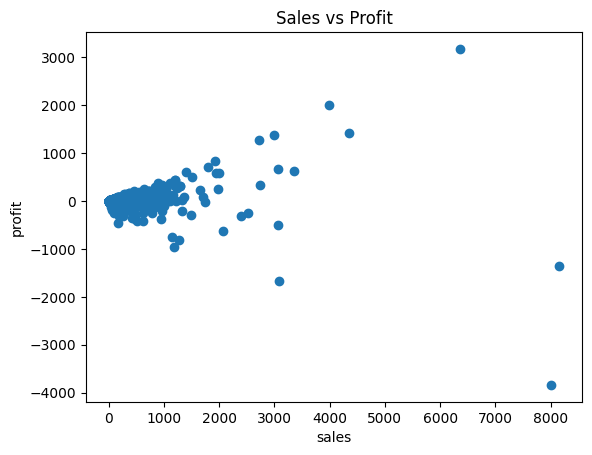

In [58]:
import matplotlib.pyplot as plt
plt.scatter(df['sales'],df['profit'])
plt.xlabel('sales')
plt.ylabel('profit')
plt.title('Sales vs Profit')
plt.show()

# Sales vs Profit scatter plot shows expected positive relationship overall.
# A few negative profit points exist (expected for discounted or loss-making sales).
# No abnormal or inconsistent entries detected at this stage.

# part 2: DESCRIPTIVE Statistics
(In this chapter, the dataset is analyzed according to 12 descriptive analysis levels (DS-1 to DS-12). The steps are all covered, but not necessarily in numerical order.)

**DS-1 — Define analysis scope & metrics (target variables, units)**                    
**DS-2 — Univariate summaries for numeric fields (count/mean/median/std/min–max/quantiles)**

**DS-3 — Univariate summaries for categorical fields (value_counts, percentages, cardinality)**

In [59]:
total_sales = df['sales'].sum()
print(f'Total sales: ${total_sales:.2f}' )

Total sales: $241130.77


In [60]:
total_profit = df['profit'].sum()
print(f'Total profit: ${total_profit:.2f}')

Total profit: $18746.18


In [61]:
profit_margin = (total_profit / total_sales) * 100
print(f'Profit margin: {profit_margin:.1f}%')

Profit margin: 7.8%


In [62]:
total_quantity = df['quantity'].sum()
print(f'Total quantity: {total_quantity} units')

Total quantity: 3804 units


In [63]:
average_discount = df['discount'].mean() *100
print(f'Average discount: {average_discount:.1f}%')

Average discount: 16.3%


In [64]:
order = df['order_id'].nunique()
print(f'Number of unique orders: {order}')

Number of unique orders: 479


In [65]:
customer = df['customer_id'].nunique()
print(f'Number of customers: {customer}')

Number of customers: 362


In [66]:
products = df['product_id'].nunique()
print(f'Number of products: {products}')

Number of products: 764


**DS-9 — Time-based summaries (weekly/monthly totals, simple growth rates)**

In [67]:
df['order_month'] = df['order_date'].dt.strftime('%Y-%m')
monthly_sales = df.groupby('order_month')['sales'].sum()
monthly_sales

,sales
order_month,
2014-01,1980.5980
2014-02,713.8280
2014-03,861.2620
2014-04,787.6680
2014-05,5167.1440
2014-06,11314.3310
2014-07,2926.3300
2014-08,3721.5820
2014-09,20445.0640


In [68]:
iso = df['order_date'].dt.isocalendar()
df['order_yearweek'] = iso.year.astype(str) + ' W ' + iso.week.astype(str).str.zfill(2)
weekly_sales = (df.groupby('order_yearweek')['sales'].sum().sort_index())
weekly_sales

,sales
order_yearweek,
2014 W 01,288.0600
2014 W 02,105.3140
2014 W 03,1587.2240
2014 W 05,468.9000
2014 W 06,115.3600
...,...
2017 W 48,6961.5810
2017 W 49,5107.3610
2017 W 50,158.0940


In [69]:

weekly_quantity = df.groupby('order_yearweek')['quantity'].sum()
weekly_quantity

,quantity
order_yearweek,
2014 W 01,8
2014 W 02,9
2014 W 03,34
2014 W 05,6
2014 W 06,7
...,...
2017 W 48,107
2017 W 49,77
2017 W 50,16


**DS-11 — Contribution analysis (Pareto 80/20, Top-N products/customers/regions)**

In [70]:
top10 = df.sort_values(by= ['sales','profit'], ascending=[False,False]).head(10)
top10

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,order_month,order_yearweek
165,166,CA-2014-139892,2014-09-08,2014-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.4,-1359.9920,2014-09,2014 W 37
683,684,US-2017-168116,2017-11-04,2017-11-04,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904,2017-11,2017 W 44
509,510,CA-2015-145352,2015-03-16,2015-03-22,Standard Class,CM-12385,Christopher Martinez,Consumer,United States,Atlanta,...,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750,2015-03,2015 W 12
353,354,CA-2016-129714,2016-09-01,2016-09-03,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,...,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,4355.168,4,0.2,1415.4296,2016-09,2016 W 35
318,319,CA-2014-164973,2014-11-04,2014-11-09,Standard Class,NM-18445,Nathan Mautz,Home Office,United States,New York City,...,TEC-MA-10002927,Technology,Machines,Canon imageCLASS MF7460 Monochrome Digital Las...,3991.980,2,0.0,1995.9900,2014-11,2014 W 45
251,252,CA-2016-145625,2016-09-11,2016-09-17,Standard Class,KC-16540,Kelly Collister,Consumer,United States,San Diego,...,TEC-AC-10003832,Technology,Accessories,Logitech P710e Mobile Speakerphone,3347.370,13,0.0,636.0003,2016-09,2016 W 36
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522,2015-09,2015 W 38
977,978,CA-2017-159366,2017-01-07,2017-01-10,First Class,BW-11110,Bart Watters,Corporate,United States,Detroit,...,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,3059.982,2,0.1,679.9960,2017-01,2017 W 01
262,263,US-2014-106992,2014-09-19,2014-09-21,Second Class,SB-20290,Sean Braxton,Corporate,United States,Houston,...,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,3059.982,3,0.4,-509.9970,2014-09,2014 W 38
515,516,CA-2017-127432,2017-01-22,2017-01-27,Standard Class,AD-10180,Alan Dominguez,Home Office,United States,Great Falls,...,TEC-CO-10003236,Technology,Copiers,Canon Image Class D660 Copier,2999.950,5,0.0,1379.9770,2017-01,2017 W 03


In [71]:
pareto_df = df.groupby('product_name')['sales'].sum().reset_index()
pareto_df = pareto_df.sort_values(by='sales', ascending=False)

In [72]:
pareto_df['cum_sales'] = pareto_df['sales'].cumsum()
pareto_df['cum_sales_pct'] = 100 * pareto_df['cum_sales'] / pareto_df['sales'].sum()

In [73]:
pareto_threshold = pareto_df[pareto_df['cum_sales_pct'] <=80]
print(f"Number of products contributing to 80% of sales: {pareto_threshold.shape[0]}")

Number of products contributing to 80% of sales: 159


**Pareto Analysis – Contribution to Sales**

A total of 159 products (≈ top 20% of all products) contribute to 80% of total sales revenue. This confirms a classic Pareto distribution where a relatively small portion of products drives the majority of sales, suggesting that focusing on these key products could have the highest business impact.

**DS-10 — Derived ratios/metrics (e.g., profit margin = profit/sales, discount rate)**

In [74]:
shipping_days =  df['ship_date'] - df['order_date']
shipping_days

,0
0,3 days
1,3 days
2,4 days
3,7 days
4,7 days
...,...
995,4 days
996,6 days
997,6 days
998,6 days


In [75]:
df['shipping_days'] = (df['ship_date'] - df['order_date']).dt.days

In [76]:
bins = np.linspace(min(df['discount']), max(df['discount']),4)
group_names = ['Low','Medium','High']
df['discount_binned'] = pd.cut(df['discount'],bins,labels=group_names, include_lowest=True)
df[['discount','discount_binned']]

,discount,discount_binned
0,0.00,Low
1,0.00,Low
2,0.00,Low
3,0.45,Medium
4,0.20,Low
...,...,...
995,0.00,Low
996,0.00,Low
997,0.00,Low
998,0.00,Low


**DS-6 — Bivariate summaries (groupby/pivot)**

In [77]:
categorical_profit = df.groupby(['category','sub_category'])[['sales','profit']].mean()
categorical_profit['categorical_margin_%'] = round(categorical_profit['profit']/categorical_profit['sales'],2)*100
categorical_profit

sales      profit  categorical_margin_%
category        sub_category                                               
Furniture       Bookcases      658.809067  -93.890410                 -14.0
                Chairs         531.191172   50.087781                   9.0
                Furnishings    107.967305    8.174344                   8.0
                Tables         741.715348 -104.605294                 -14.0
Office Supplies Appliances     194.648326   20.201628                  10.0
                Art             47.630667    9.319358                  20.0
                Binders        147.672614   33.887526                  23.0
                Envelopes       70.311067   27.572287                  39.0
                Fasteners       18.174286    6.660443                  37.0
                Labels          37.422927   15.916183                  43.0
                Paper           50.285354   21.747412                  43.0
                Storage        229.575116   19.558452                   9.0
                Supplies       119.582400  -15.303800                 -13.0
Technology      Accessories    246.763783   63.859630                  26.0
                Copiers       1559.972000  610.489133                  39.0
                Machines      2509.393538 -380.873408                 -15.0
                Phones         352.687500   45.517499                  13.0

**DS-12 — Segmented summary tables (Segment/Region/Category × key metrics)**

In [78]:
segmental_profit = df.groupby('segment')[['sales','profit']].sum()
segmental_profit['discount'] = df.groupby('segment')['discount'].mean() *100

In [79]:
segmental_profit = segmental_profit.rename(columns= {'sales': ' $ sales', 'profit': '$ profit', 'discount': 'avg_discount %'})

In [80]:
segmental_profit

,$ sales,$ profit,avg_discount %
segment,,,
Consumer,118554.3034,9367.7052,16.204753
Corporate,70821.3018,1976.6129,15.466431
Home Office,51755.1627,7401.8611,17.805882


In [81]:
regional_profit = df.groupby(['country','region','state','city'])[['sales','profit']].mean()
regional_profit['discount_%'] = df.groupby(['country','region','state','city'])['discount'].mean()*100
regional_profit['discount_%'] = round(regional_profit['discount_%'],2)

In [82]:
regional_profit['profit_margin_%'] = round(regional_profit['profit']/regional_profit['sales'],2)*100
regional_profit

sales      profit  \
country       region  state      city                                   
United States Central Illinois   Aurora        351.840000  -26.780000   
                                 Bloomington   617.700000 -407.682000   
                                 Chicago       218.733171  -10.280114   
                                 Decatur       297.511500   -3.566475   
                                 Evanston       11.992000    0.899400   
...                                                   ...         ...   
              West    Washington Des Moines   1023.177000  364.853250   
                                 Edmonds       387.442500   94.873100   
                                 Marysville      8.820000    2.381400   
                                 Seattle       195.018069   49.544621   
                                 Vancouver     211.058667   20.115400   

                                              discount_%  profit_margin_%  
country       region  state      city                                      
United States Central Illinois   Aurora            55.00             -8.0  
                                 Bloomington       50.00            -66.0  
                                 Chicago           40.29             -5.0  
                                 Decatur           22.50             -1.0  
                                 Evanston          20.00              8.0  
...                                                  ...              ...  
              West    Washington Des Moines        10.00             36.0  
                                 Edmonds            0.00             24.0  
                                 Marysville         0.00             27.0  
                                 Seattle            8.28             25.0  
                                 Vancouver          6.67             10.0  

[195 rows x 4 columns]

**DS-4 — Distribution shape signals (quick skewness/kurtosis check—detection only)**

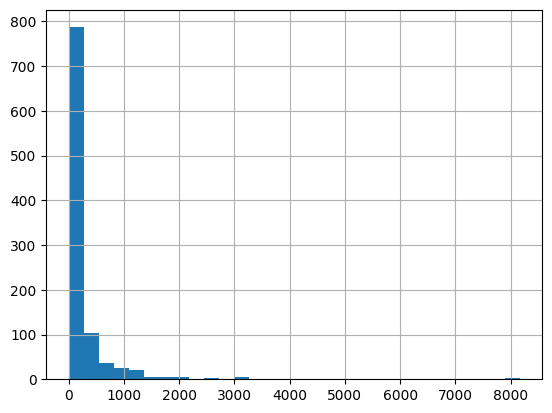

In [83]:

df['sales'].hist(bins=30)
plt.show()

**Histogram Analysis – Profit (Zoomed)**

The histogram shows that profit values are extremely concentrated around zero, creating a sharp, narrow peak. This indicates that most transactions yield very small profit amounts, while a relatively small number of transactions contribute to the long positive and negative tails. The pattern is consistent with the high kurtosis observed earlier and reinforces the need for outlier detection.

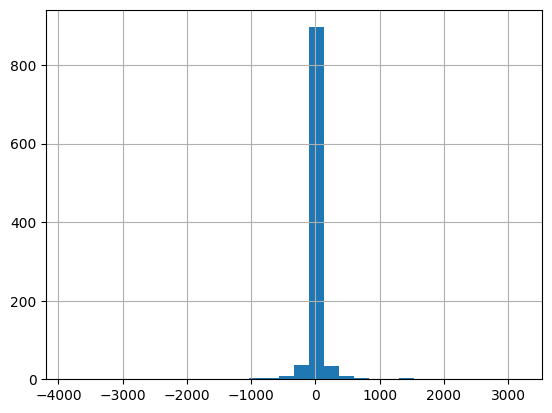

In [84]:
df['profit'].hist(bins=30)
plt.show()

**Histogram Analysis – Profit**

The profit distribution is extremely concentrated around zero, forming a very narrow peak. Most orders yield small profit values, with relatively few transactions generating large gains or losses. The long tails on both sides suggest the presence of significant profit outliers, which was also confirmed by the high kurtosis value in DS-4

In [85]:
print('Sales skew: ', df['sales'].skew())
print('Sales kurtosis: ', df['sales'].kurt())

print('Profit skew: ', df['profit'].skew())
print('Profit kurtosis: ', df['profit'].kurt())

Sales skew:  7.385799850541945
Sales kurtosis:  76.9249579685999
Profit skew:  -1.6478861752654552
Profit kurtosis:  137.60519034970324


**Distribution Shape Analysis – Key Insights**

**Sales**: The distribution is highly right-skewed (skew = 7.39) with a very high kurtosis (kurtosis = 76.9), indicating a classic “long-tail” pattern. Most orders contribute relatively small sales amounts, while a few very large transactions drive a disproportionate share of total revenue.

**Profit**: The profit distribution shows moderate left-skewness (skew = -1.65), confirming the presence of some loss-making orders. Its extremely high kurtosis (kurtosis = 137.6) highlights that profit values are concentrated around a narrow range, with a few extreme profit or loss outliers.

**These findings suggest that** outlier detection (DS-5) is crucial before performing further modeling or decision-making, to better understand the impact of rare but influential transactions.

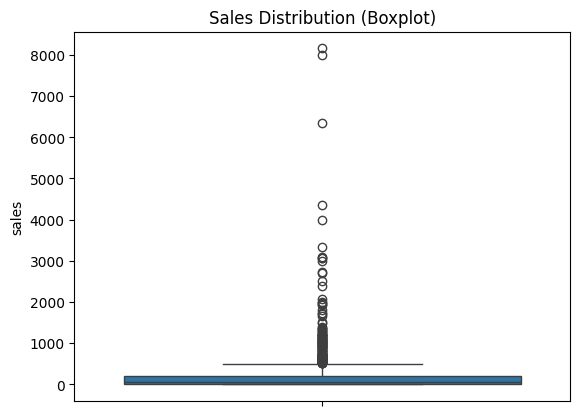

In [86]:
sns.boxplot(y=df['sales'])
plt.title('Sales Distribution (Boxplot)')
plt.show()

**Boxplot Analysis – Sales**

The boxplot clearly shows a very right-skewed sales distribution, with a large number of transactions clustered at relatively low sales values and a long tail of high-value sales orders. The numerous points above the whisker represent outliers as per the IQR rule, confirming that a small number of orders have disproportionately large sales amounts. This visual supports the skewness and kurtosis results and highlights the need for outlier flagging before deeper analysis or modeling.

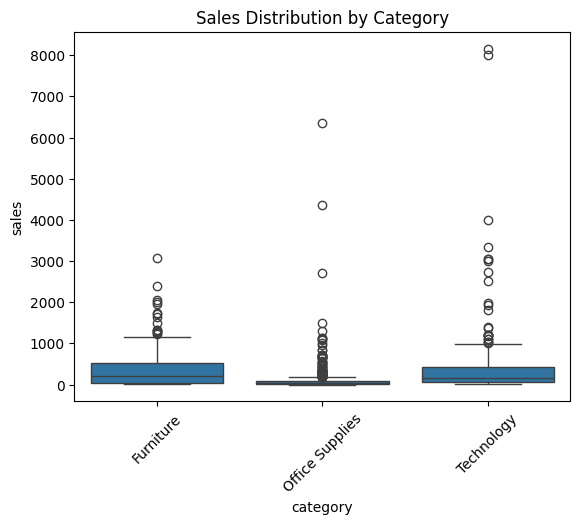

In [87]:
sns.boxplot(x='category',y='sales', data=df)
plt.title('Sales Distribution by Category')
plt.xticks(rotation=45)
plt.show()

**Boxplot Analysis – Sales by Category**

This boxplot highlights distinct sales distribution patterns across categories.

Office Supplies has the narrowest interquartile range, indicating more consistent and lower-value sales transactions.

Furniture and Technology show wider spreads and higher medians, suggesting larger transaction sizes.

All categories contain multiple high-value outliers, with Technology showing the highest extreme sales amounts (up to 8,000+), confirming its significant contribution to overall revenue variability.

This breakdown helps identify which categories contribute most to sales volatility and where large outlier transactions are concentrated.

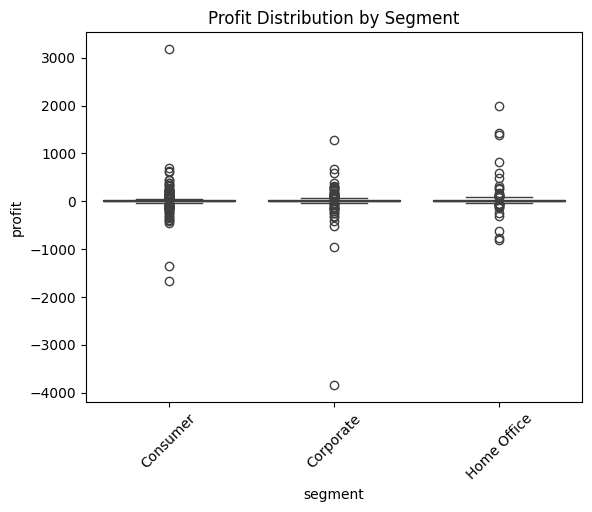

In [88]:
sns.boxplot(x='segment', y='profit',data=df)
plt.xticks(rotation=45)
plt.title('Profit Distribution by Segment')
plt.show()


**Boxplot Analysis – Profit by Segment**

This boxplot reveals that profit distributions are highly concentrated around zero across all three segments, with numerous extreme outliers on both profit and loss sides.

Corporate segment shows the most pronounced negative outliers, including one order with a loss exceeding -3,500.

Home Office segment appears slightly more volatile with a wider spread of profit outcomes.

The presence of significant negative profit outliers confirms the existence of loss-making transactions across all segments, which could disproportionately impact overall profitability.

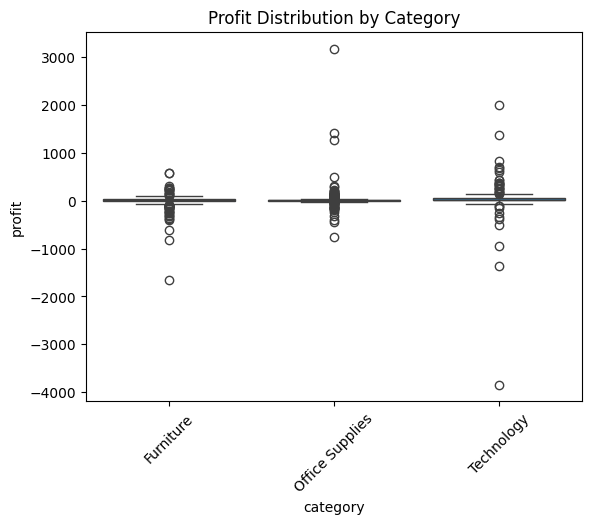

In [89]:
sns.boxplot(x='category',y='profit',data=df)
plt.xticks(rotation=45)
plt.title('Profit Distribution by Category')
plt.show()

**Boxplot Analysis – Profit by Category**

This boxplot shows that profit distributions are tightly centered near zero across all categories, with numerous extreme positive and negative outliers.

Technology exhibits the widest range of profit outcomes, including the largest single loss (≈ -4000) and several very high positive profits.

Office Supplies has the most compact interquartile range, indicating more consistent profitability but still contains a few extreme losses.

Furniture shows moderate variability with both high-profit and negative-profit orders present.

This view is particularly useful for identifying which categories contribute most to overall profit volatility and may warrant further drill-down analysis (e.g., sub-category or product-level loss investigation).

**DS-5 — Outlier flags (IQR rule—flagging only, no action)**

In [90]:
q1= df['sales'].quantile(0.25)
q3 = df['sales'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

iqr = round(iqr,2)
lower_bound = round(lower_bound,2)
upper_bound = round(upper_bound,2)

print('IQR: ', iqr)
print('Lower bound: ', lower_bound)
print('Upper bound: ', upper_bound)

IQR:  194.83
Lower bound:  -273.86
Upper bound:  505.45


**IQR Outlier Detection – Sales**

The interquartile range (IQR) for sales is approximately 194.8, meaning that the middle 50% of sales values fall within this range.

The calculated lower bound is -273.86, which is below zero; therefore, no sales values are expected to fall below this threshold.

The upper bound is 505.45, and any sales values above this limit are flagged as high-value outliers.

This confirms that the outliers are concentrated on the upper side of the distribution, consistent with the highly right-skewed sales pattern observed earlier.

In [91]:
df['sales_outlier'] = (df['sales'] < lower_bound) | (df['sales'] > upper_bound)
print("Number of sales outliers:", df['sales_outlier'].sum())


Number of sales outliers: 120


**DS-7 — Categorical × categorical cross-tabs (counts + row/column percentages)**

In [92]:
ct_segment_region = pd.crosstab(df['segment'],df['region'], normalize='index').round(2) *100
ct_segment_region = ct_segment_region.rename(columns={'Central':'Central %', 'East':'East %','South':'South %','West':'West %'})
ct_segment_region

region,Central %,East %,South %,West %
segment,,,,
Consumer,22.0,30.0,14.0,34.0
Corporate,27.0,28.0,16.0,29.0
Home Office,27.0,41.0,11.0,21.0


In [93]:
ct_category_shipmode = pd.crosstab(df['category'],df['ship_mode'], normalize='index').round(2)*100
ct_category_shipmode = ct_category_shipmode.rename(columns={'First Class': 'First Class %','Same Day': 'Same Day %','Second Class':'Second Class %','Standard Class': 'Standart %'})
ct_category_shipmode

ship_mode,First Class %,Same Day %,Second Class %,Standart %
category,,,,
Furniture,14.0,2.0,25.0,58.0
Office Supplies,20.0,1.0,19.0,60.0
Technology,19.0,2.0,26.0,54.0


**DS-8 — Correlation matrix for numeric variables (Pearson/Spearman—detection only)**

In [94]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['sales'],df['profit'])
print(f"""Pearson correlation: {pearson_coef},
          P-value: {p_value}  """)

Pearson correlation: 0.02942559295244409,
          P-value: 0.35260080059616977  


**Sales → Profit (Pearson Correlation)**

The correlation between sales and profit is very weak (r ≈ 0.03) and statistically insignificant (p ≈ 0.35). This indicates that higher sales amounts do not necessarily translate into higher profits in this dataset, suggesting that discounts or cost structures may be reducing profitability for some large orders.

In [95]:
pearson_coef, p_value = stats.pearsonr(df['sales'],df['quantity'])
print(f""" Pearson correlation: {pearson_coef},
           P-value: {p_value}
""")

 Pearson correlation: 0.20878629680981892,
           P-value: 2.597340654862084e-11



**Sales → Quantity (Pearson Correlation)**

There is a weak-to-moderate positive correlation between sales and quantity (r ≈ 0.21), and it is statistically significant (p < 0.001). This means that orders with higher quantities tend to have higher sales values, which is expected, but the relationship is not very strong — price differences and discounts likely create variability.

In [96]:
pearson_coef, p_value = stats.pearsonr(df['sales'],df['discount'])
print(f""" Pearson correlation: {pearson_coef},
           P-value: {p_value}
""")

 Pearson correlation: 0.028918803990956754,
           P-value: 0.36095851968514275



**Sales → Discount (Pearson Correlation)**

The correlation between sales and discount is nearly zero (r ≈ 0.03) and statistically insignificant (p ≈ 0.36). This suggests that higher or lower discounts do not have a clear linear relationship with the sales amount in this dataset — discounts might be applied independently of order value.

In [97]:
pearson_coef, p_value = stats.pearsonr(df['sales'],df['shipping_days'])
print(f""" Pearson correlation: {pearson_coef},
           P-value: {p_value}
""")

 Pearson correlation: -0.04779273275448539,
           P-value: 0.1309638974107341



**Sales → Shipping Days (Pearson Correlation)**

The correlation between sales and shipping days is very weak and slightly negative (r ≈ -0.05), with no statistical significance (p ≈ 0.13). This indicates that order value has no meaningful impact on delivery time — high-value orders are not shipped noticeably faster or slower on average.

In [98]:
pearson_coef, p_value = stats.pearsonr(df['profit'],df['quantity'])
print(f""" Pearson correlation: {pearson_coef},
           P-value: {p_value}
""")

 Pearson correlation: 0.009271718013291075,
           P-value: 0.7696467043204892



**Profit → Quantity (Pearson Correlation)**

The correlation between profit and quantity is essentially zero (r ≈ 0.01) and statistically insignificant (p ≈ 0.77). This means that the number of items in an order has no meaningful linear relationship with profitability — both small and large quantity orders can be profitable or loss-making.

In [99]:
pearson_coef, p_value = stats.pearsonr(df['profit'],df['discount'])
print(f""" Pearson correlation: {pearson_coef},
           P-value: {p_value}
""")

 Pearson correlation: -0.254832462331498,
           P-value: 2.7476697781972673e-16



**Profit → Discount (Pearson Correlation)**

There is a moderate negative correlation between profit and discount (r ≈ -0.25), which is highly statistically significant (p < 0.001). This indicates that higher discounts are strongly associated with lower profitability, confirming that discounting has a measurable negative impact on profit margins.

In [100]:
pearson_coef, p_value = stats.pearsonr(df['profit'],df['shipping_days'])
print(f""" Pearson correlation: {pearson_coef},
           P-value: {p_value}
""")

 Pearson correlation: 0.0403570982328028,
           P-value: 0.20226435870429185



**Profit → Shipping Days (Pearson Correlation)**

The correlation between profit and shipping days is very weak and statistically insignificant (r ≈ 0.04, p ≈ 0.20). This means that delivery time does not have a meaningful linear relationship with order profitability — faster or slower shipments do not systematically affect profit levels.

In [101]:
pearson_coef, p_value = stats.pearsonr(df['discount'],df['shipping_days'])
print(f""" Pearson correlation: {pearson_coef},
           P-value: {p_value}
""")

 Pearson correlation: 0.006303832824821543,
           P-value: 0.8421865933523006



**Discount → Shipping Days (Pearson Correlation)**

The correlation between discount and shipping days is essentially zero (r ≈ 0.006) and statistically insignificant (p ≈ 0.84). This indicates that discounts are not related to delivery times — offering a discount does not speed up or slow down order fulfillment.

**Correlation Analysis – Key Insights**

The Pearson correlation analysis revealed that most numeric relationships are weak or negligible, with only a few statistically significant findings. Sales and quantity showed a weak but significant positive correlation, indicating that higher quantities generally lead to higher sales values. The most important relationship was between profit and discount, which showed a moderate negative and highly significant correlation – confirming that higher discounts consistently reduce profitability. Other correlations, such as sales → profit or profit → quantity, were close to zero and statistically insignificant, indicating no meaningful linear relationship. Shipping days showed no notable correlation with any financial metric, suggesting that delivery time does not systematically affect sales or profit.

# part 3:  BASIC Visualizations (e.g., bar, line, pie charts)

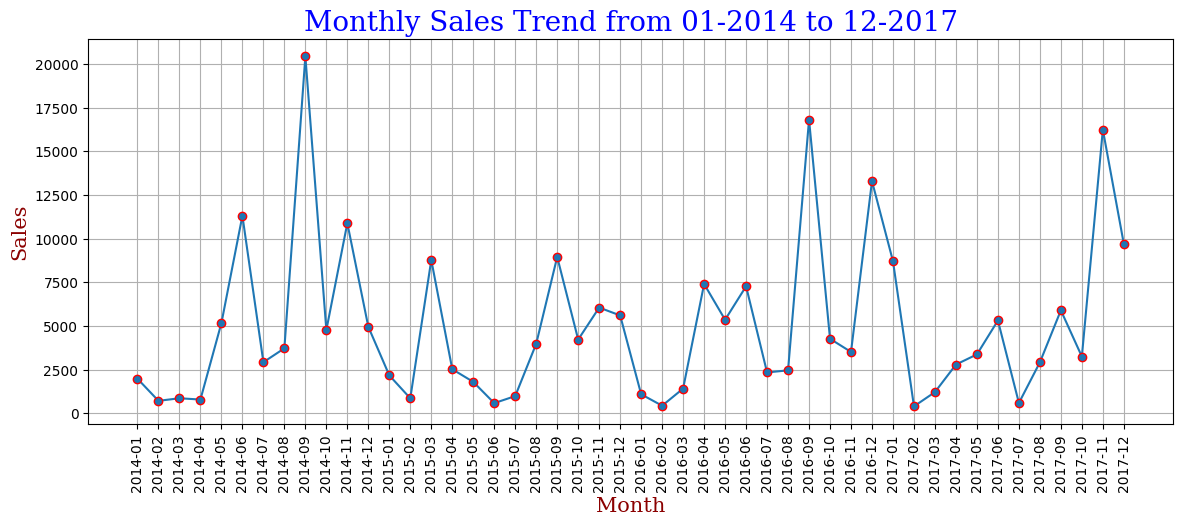

In [102]:
plt.figure(figsize=(14,5))
x = monthly_sales.index
y = monthly_sales.values
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.plot(x,y, marker='o', mec='r')
plt.grid(axis='y')
plt.grid(axis='x')
plt.title('Monthly Sales Trend from 01-2014 to 12-2017', fontdict=font1)
plt.xlabel('Month', fontdict=font2)
plt.ylabel('Sales', fontdict=font2)
plt.xticks(rotation=90)
plt.show()

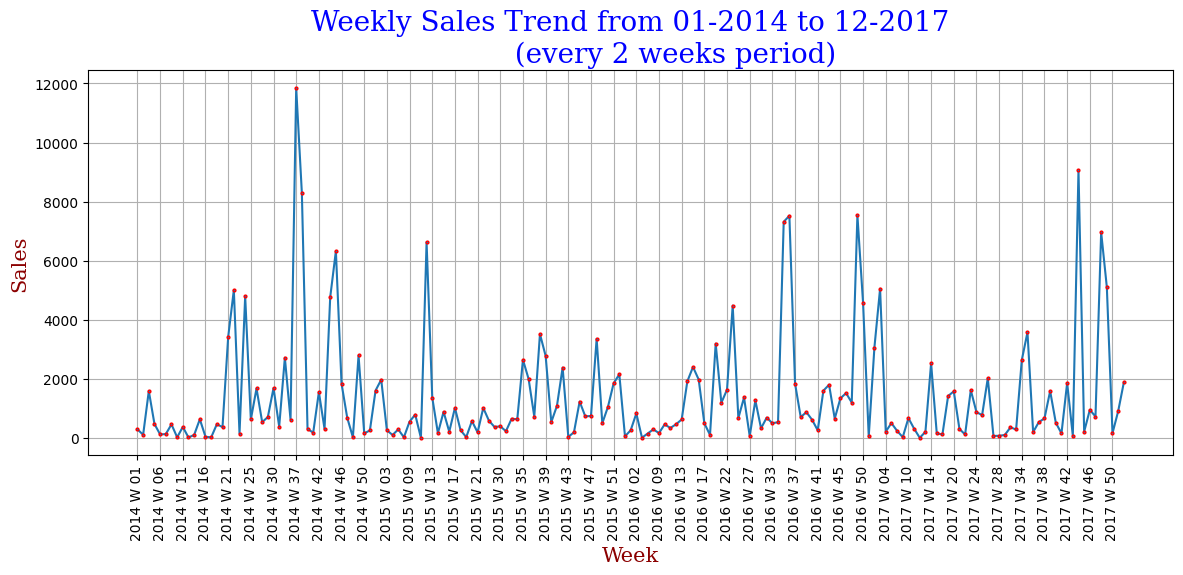

In [103]:
plt.figure(figsize=(14,5))
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.plot(weekly_sales.index, weekly_sales.values, marker='o', ms=2, mec='r')
plt.grid()
plt.title("""Weekly Sales Trend from 01-2014 to 12-2017
          (every 2 weeks period)""", fontdict=font1)
plt.xlabel('Week', fontdict=font2)
plt.ylabel('Sales', fontdict=font2)
plt.xticks(weekly_sales.index[::4],rotation=90)
plt.show()

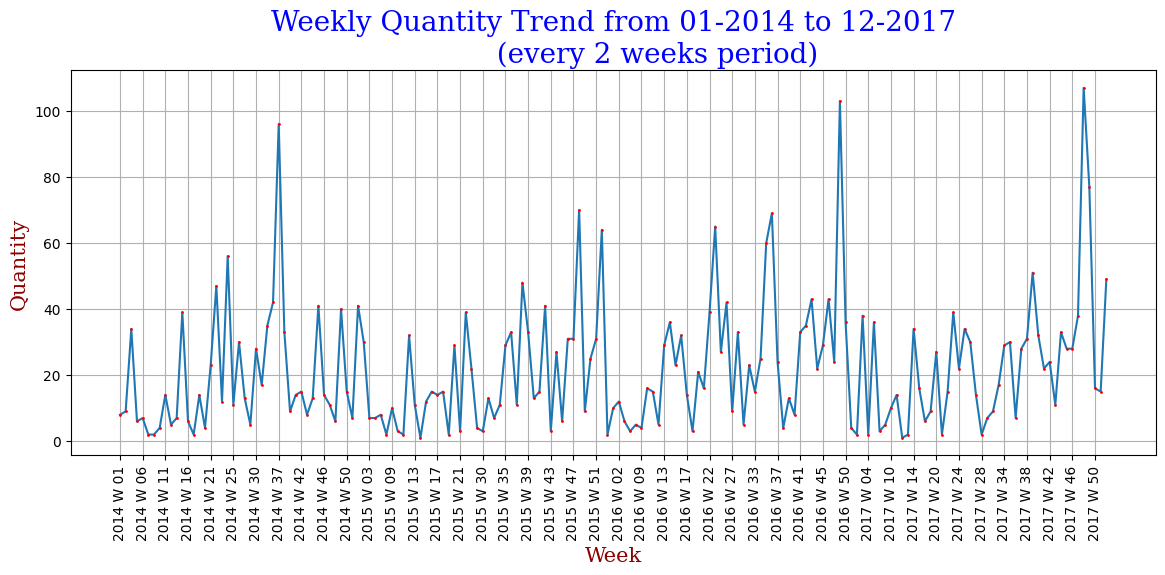

In [104]:
plt.figure(figsize=(14,5))
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.plot(weekly_quantity.index, weekly_quantity.values, marker='o', ms=1, mec='r')
plt.grid()
plt.title("""Weekly Quantity Trend from 01-2014 to 12-2017
          (every 2 weeks period)""", fontdict=font1)
plt.xlabel('Week', fontdict=font2)
plt.ylabel('Quantity', fontdict=font2)
plt.xticks(weekly_quantity.index[::4], rotation=90)
plt.title
plt.show()


Monthly and weekly trends show strong seasonality, with noticeable sales spikes in certain months and weeks. Weekly quantity closely follows weekly sales patterns

In [105]:
total_profit_by_category = df.groupby('category')['profit'].sum().sort_values()

In [106]:
total_sales_by_category = df.groupby('category')['sales'].sum().sort_values()

In [107]:
total_sales_by_sub_cat = df.groupby('sub_category')['sales'].sum().sort_values()

In [108]:
sales_profit_by_segment = df.groupby('segment')[['sales','profit']].sum()

In [117]:
sales_by_region = df.groupby('region')[['sales','profit']].sum()

In [140]:
df['row_margin'] = (sum(df['profit'])/ sum(df['sales'])) *100

In [144]:
# Weighted margin by category = sum(profit) / sum(sales)
cat_agg = df.groupby('category')[['profit','sales']].sum()
cat_agg['margin_%'] = (cat_agg['profit'] / cat_agg['sales']) * 100


In [146]:
profit_by_discount_bin = df.groupby('discount_binned')['profit'].mean()

/tmp/ipython-input-1262451797.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_discount_bin = df.groupby('discount_binned')['profit'].mean()


<BarContainer object of 3 artists>

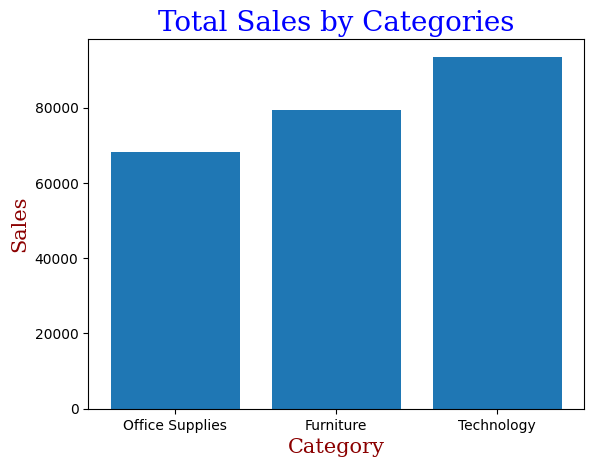

In [139]:
plt.title('Total Sales by Categories',fontdict=font1)
plt.ylabel('Sales', fontdict=font2)
plt.xlabel('Category',fontdict=font2)

plt.bar(total_sales_by_category.index, total_sales_by_category.values)

<BarContainer object of 3 artists>

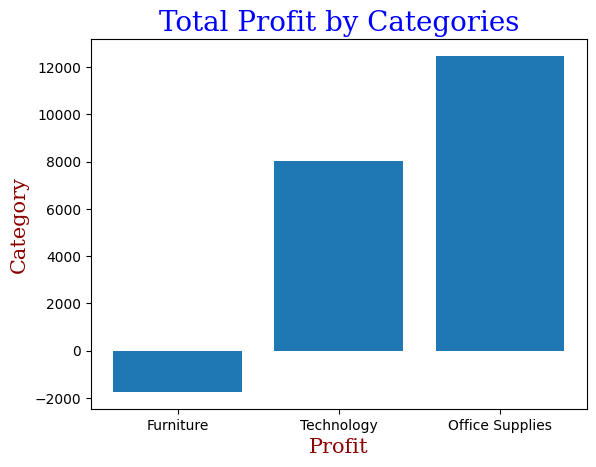

In [112]:
import matplotlib.pyplot as plt


plt.title('Total Profit by Categories',fontdict=font1)
plt.xlabel('Profit', fontdict=font2)
plt.ylabel('Category',fontdict=font2)

plt.bar(total_profit_by_category.index, total_profit_by_category.values)

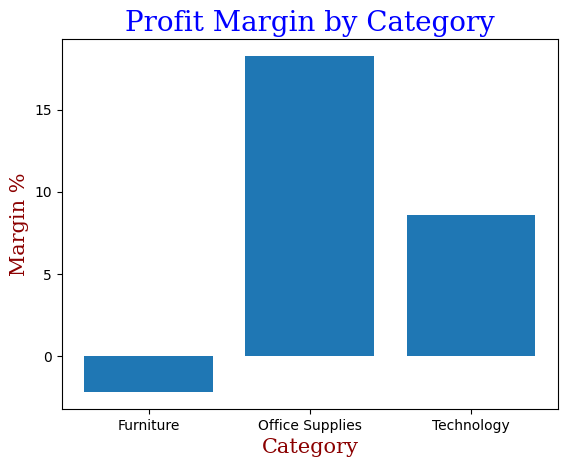

In [145]:
plt.title('Profit Margin by Category', fontdict=font1)
plt.xlabel('Category', fontdict=font2)
plt.ylabel('Margin %', fontdict=font2)
plt.bar(cat_agg.index, cat_agg['margin_%'])
plt.show()


<BarContainer object of 17 artists>

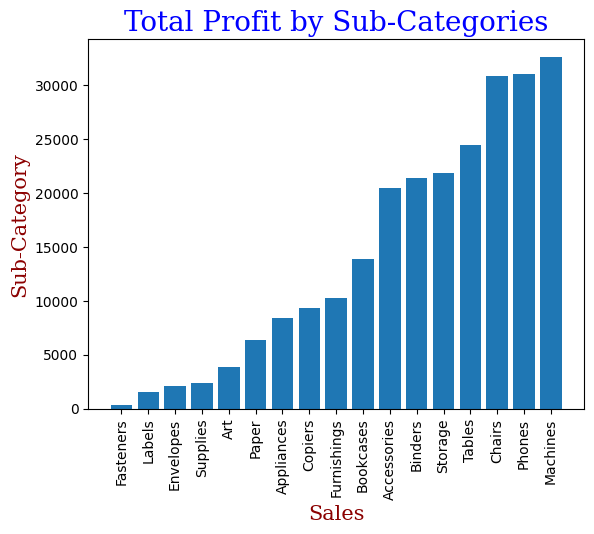

In [113]:
plt.title('Total Profit by Sub-Categories',fontdict=font1)
plt.xlabel('Sales', fontdict=font2)
plt.ylabel('Sub-Category',fontdict=font2)
plt.xticks(rotation=90)
plt.bar(total_sales_by_sub_cat.index, total_sales_by_sub_cat.values)

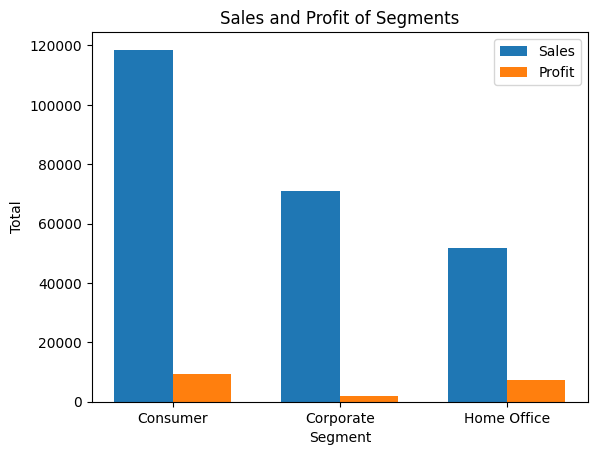

In [114]:
x = np.arange(len(sales_profit_by_segment.index))

width = 0.35


plt.bar(x - width/2, sales_profit_by_segment['sales'], width, label='Sales')
plt.bar(x + width/2, sales_profit_by_segment['profit'], width, label= 'Profit')

plt.xticks(x, sales_profit_by_segment.index)
plt.title('Sales and Profit of Segments')
plt.xlabel('Segment')
plt.ylabel('Total')
plt.legend()
plt.show()

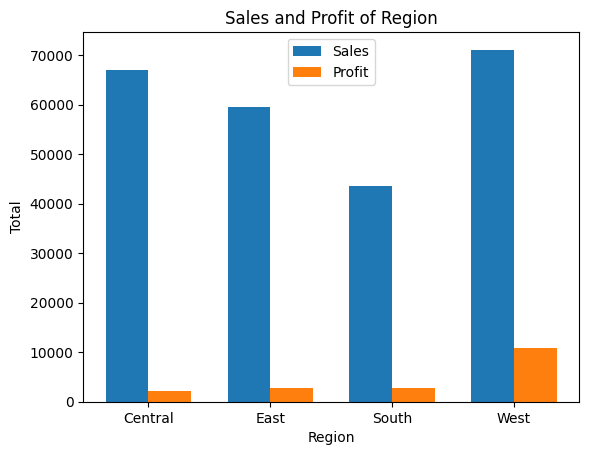

In [119]:
x = np.arange(len(sales_by_region.index))

width = 0.35


plt.bar(x - width/2, sales_by_region['sales'], width, label='Sales')
plt.bar(x + width/2, sales_by_region['profit'], width, label= 'Profit')

plt.xticks(x, sales_by_region.index)
plt.title('Sales and Profit of Region')
plt.xlabel('Region')
plt.ylabel('Total')
plt.legend()
plt.show()

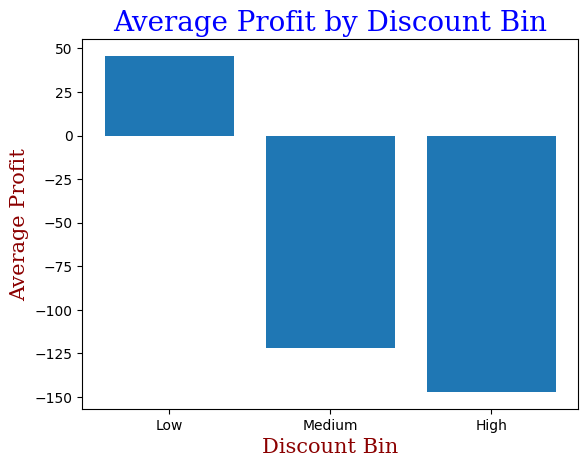

In [148]:
df['discount_binned'].value_counts(dropna=False)
bins = [0, 0.2, 0.4, 1.0]
labels = ['Low','Medium','High']
df['discount_binned'] = pd.cut(df['discount'], bins=bins, labels=labels, include_lowest=True)

profit_by_bin = df.groupby('discount_binned', observed=False)['profit'].mean().reindex(labels)
profit_by_bin = profit_by_bin.fillna(0)  # boş bin varsa 0 yap

plt.title('Average Profit by Discount Bin', fontdict=font1)
plt.xlabel('Discount Bin', fontdict=font2)
plt.ylabel('Average Profit', fontdict=font2)
plt.bar(profit_by_bin.index, profit_by_bin.values)
plt.show()

## Summary of Key Findings

- **Total Sales:** $241,130.77  
- **Total Profit:** $18,746.18  
- **Overall Profit Margin:** **7.8%**  
- **Unique Orders:** 479  
- **Total Quantity Sold:** 3,804  
- **Average Discount:** **16.3%**

- **Top Categories by Sales:**  
  1. Technology – $93,499.84  
  2. Furniture – $76,074.41  
  3. Office Supplies – $68,253.35  

- **Top Categories by Profit:**  
  1. Office Supplies – $12,470.73  
  2. Technology – $8,017.47  
  3. Furniture – **–$407.09** (negative profit)

- **Discount vs Profit Relationship:**  
  Discounts show a **moderate negative correlation** with profit (≈ –0.25).  
  Higher discount levels are associated with **declining profitability**, highlighting the need for more balanced pricing and promotional strategies.

**Key Insights:**  
- *Office Supplies* emerges as the most profitable category and should be prioritized in promotions.  
- *Furniture* shows a **loss overall**, suggesting potential issues with pricing, shipping costs, or over-discounting.  
- Discount policies need careful review since **excessive discounts erode profit margins** significantly.
